# Tugas 3 - Analisis Supermarket Sales
Notebook ini berisi eksplorasi data `supermarket_sales.csv` menggunakan Pandas dan Matplotlib untuk menjawab sejumlah pertanyaan analisis penjualan.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", None)

DATA_PATH = "supermarket_sales.csv"


In [2]:
df = pd.read_csv(DATA_PATH)
print("Dataset berhasil dimuat dengan", len(df), "baris")
df.head(10)


Dataset berhasil dimuat dengan 1000 baris


,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260
5,Female,692-92-5582,B,Mandalay,Member,Food and beverages,54.84,3,8.2260
6,Female,351-62-0822,B,Mandalay,Member,Fashion accessories,14.48,4,2.8960
7,Female,365-64-0515,A,Yangon,Normal,Electronic accessories,46.95,5,11.7375
8,Female,829-34-3910,A,Yangon,Normal,Health and beauty,71.38,10,35.6900
9,Female,299-46-1805,B,Mandalay,Member,Sports and travel,93.72,6,28.1160


In [3]:
print("Informasi umum dataset:")
df.info()


Informasi umum dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Invoice ID     1000 non-null   object 
 2   Branch         1000 non-null   object 
 3   City           1000 non-null   object 
 4   Customer type  1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax            1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [4]:
df["Total"] = (df["Unit price"] * df["Quantity"]) + df["Tax"]
print("Kolom Total berhasil ditambahkan. Contoh nilai:")
df[["Invoice ID", "Unit price", "Quantity", "Tax", "Total"]].head()


Kolom Total berhasil ditambahkan. Contoh nilai:


,Invoice ID,Unit price,Quantity,Tax,Total
0,750-67-8428,74.69,7,261.415,784.245
1,226-31-3081,15.28,5,3.820,80.220
2,355-53-5943,68.84,6,20.652,433.692
3,315-22-5665,73.56,10,36.780,772.380
4,665-32-9167,36.26,2,3.626,76.146


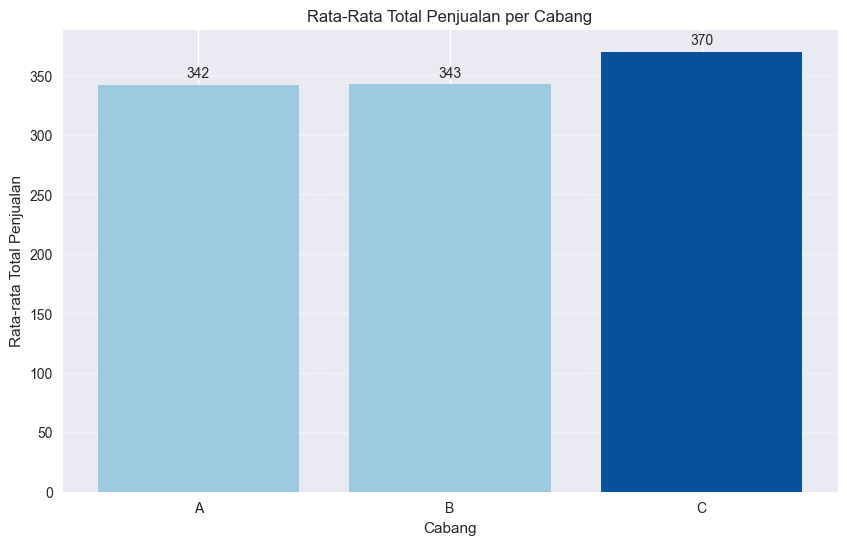

Branch
A    342.255726
B    342.713005
C    369.972887
Name: Total, dtype: float64

In [5]:
avg_total_per_branch = df.groupby("Branch")["Total"].mean().sort_values()

fig, ax = plt.subplots()
colors = ["#9ecae1" if branch != avg_total_per_branch.idxmax() else "#08519c" for branch in avg_total_per_branch.index]
ax.bar(avg_total_per_branch.index, avg_total_per_branch.values, color=colors)
ax.set_title("Rata-Rata Total Penjualan per Cabang")
ax.set_xlabel("Cabang")
ax.set_ylabel("Rata-rata Total Penjualan")
ax.grid(axis="y", linestyle="--", alpha=0.5)
for idx, value in enumerate(avg_total_per_branch.values):
    ax.text(idx, value + (value * 0.01), f"{value:,.0f}", ha="center", va="bottom", fontsize=10)
plt.show()

avg_total_per_branch


In [7]:
max_row = df.loc[df["Total"].idxmax()].copy()
min_row = df.loc[df["Total"].idxmin()].copy()

columns_to_show = [
    "Invoice ID",
    "Branch",
    "City",
    "Customer type",
    "Product line",
    "Unit price",
    "Quantity",
    "Tax",
    "Total",
]
summary = pd.DataFrame([max_row, min_row])[columns_to_show]
summary.index = ["Penjualan Tertinggi", "Penjualan Terendah"]
summary


,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax,Total
Penjualan Tertinggi,817-69-8206,B,Mandalay,Normal,Electronic accessories,99.73,9,448.785,1346.355
Penjualan Terendah,784-21-9238,C,Naypyitaw,Member,Sports and travel,10.17,1,5.085,15.255


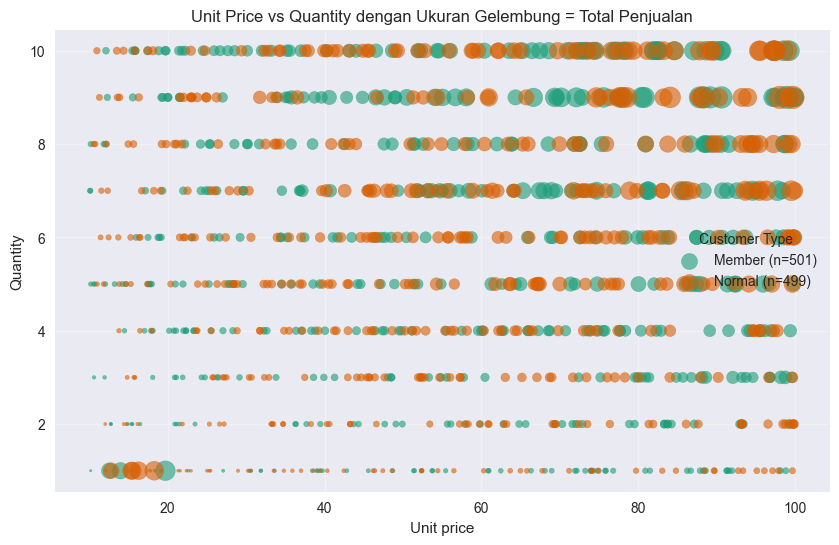

In [8]:
customer_colors = {"Member": "#1b9e77", "Normal": "#d95f02"}
fig, ax = plt.subplots()
for cust_type, group in df.groupby("Customer type"):
    ax.scatter(
        group["Unit price"],
        group["Quantity"],
        s=group["Total"] / 5,
        alpha=0.6,
        label=f"{cust_type} (n={len(group)})",
        color=customer_colors[cust_type]
    )

ax.set_title("Unit Price vs Quantity dengan Ukuran Gelembung = Total Penjualan")
ax.set_xlabel("Unit price")
ax.set_ylabel("Quantity")
ax.grid(alpha=0.3)
ax.legend(title="Customer Type")
plt.show()
